# Milestone 2 - BiDAF training notebook

In [1]:
%cd ..
# imports 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scripts_m2 import *
import torch 
from torch import nn 
from torch import optim

c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\001\OneDrive\Desktop\GUC\semester 10\nlp\NLP_PROJECT_111\QA Task milestone


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TOR

In [2]:
# Getting the dataloaders and tokenizers
train_dataloader, dev_dataloader, tokenizer = prepare_dataloaders_tokenizer()

Loading tokenizer from ./tokenizers/tokenizer.json...
Filtered dataset size: 19922 out of original 20000
Filtered dataset size: 1989 out of original 2000


In [3]:
# View the devices
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


### Model Training

In [4]:
vocab_size = 10000         # Size of the vocabulary
embed_dim = 300            # Dimensionality of the embeddings
hidden_size = 100          # Base hidden size; BiLSTM outputs will be 2*hidden_size
dropout = 0.2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate the BiDAF model
model = BiDAF(vocab_size, embed_dim, hidden_size, dropout=dropout)
model = model.to(device)

# Setup an optimizer (e.g., Adam)
optimizer = optim.AdamW(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss(ignore_index=1)


train_loss, val_loss = train_qa_context_model_boilerplate(
    model=model, 
    train_dataloader=train_dataloader, 
    val_dataloader=dev_dataloader, 
    optimizer=optimizer, 
    criterion=criterion, 
    num_epochs=20, 
    device=device, 
    inputs = ["context", "question"],
    evaluate_val_dataset=True,
)


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1/20: 100%|██████████| 623/623 [00:33<00:00, 18.63it/s, loss=4.92]


Epoch 1 Loss: 6.5496


Evaluating: 100%|██████████| 623/623 [00:22<00:00, 27.68it/s]


Training Loss: 3.2191
Training Metrics: {'start_accuracy': 0.5810159622527858, 'start_precision': 0.5842613654931372, 'start_recall': 0.5810159622527858, 'start_f1_score': 0.580136072434499, 'end_accuracy': 0.5825720309205903, 'end_precision': 0.5866722602936955, 'end_recall': 0.5825720309205903, 'end_f1_score': 0.5816061327637063, 'joint_exact_match': 0.5087842586085735, 'span_overlap_f1': 0.5479117487476831}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 22.87it/s]


Validation Loss: 5.0314
Validation Metrics: {'start_accuracy': 0.40824534942182, 'start_precision': 0.43794980518464777, 'start_recall': 0.40824534942182, 'start_f1_score': 0.40714265742809735, 'end_accuracy': 0.39668174962292607, 'end_precision': 0.423685990068493, 'end_recall': 0.39668174962292607, 'end_f1_score': 0.3954720654752996, 'joint_exact_match': 0.3162393162393162, 'span_overlap_f1': 0.384593785778124}
Validation loss improved to 5.0314. Saving model state.
--------------------------------------------------


Epoch 2/20: 100%|██████████| 623/623 [00:54<00:00, 11.44it/s, loss=2.29]


Epoch 2 Loss: 3.0705


Evaluating: 100%|██████████| 623/623 [00:19<00:00, 32.09it/s]


Training Loss: 1.7925
Training Metrics: {'start_accuracy': 0.7637285413111133, 'start_precision': 0.7678700240813439, 'start_recall': 0.7637285413111133, 'start_f1_score': 0.7640246003336488, 'end_accuracy': 0.7569521132416424, 'end_precision': 0.7605383686848619, 'end_recall': 0.7569521132416424, 'end_f1_score': 0.7568054300542415, 'joint_exact_match': 0.7165947194056822, 'span_overlap_f1': 0.747362535015455}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 27.92it/s]


Validation Loss: 4.3275
Validation Metrics: {'start_accuracy': 0.4937154348919055, 'start_precision': 0.5204381089676564, 'start_recall': 0.4937154348919055, 'start_f1_score': 0.4924613215099359, 'end_accuracy': 0.48466566113624937, 'end_precision': 0.5175155102666531, 'end_recall': 0.48466566113624937, 'end_f1_score': 0.4863845796341234, 'joint_exact_match': 0.4167923579688286, 'span_overlap_f1': 0.48815507982769896}
Validation loss improved to 4.3275. Saving model state.
--------------------------------------------------


Epoch 3/20: 100%|██████████| 623/623 [00:35<00:00, 17.77it/s, loss=2.16] 


Epoch 3 Loss: 2.1280


Evaluating: 100%|██████████| 623/623 [00:20<00:00, 30.12it/s]


Training Loss: 1.2613
Training Metrics: {'start_accuracy': 0.8345045678144765, 'start_precision': 0.8367867319179747, 'start_recall': 0.8345045678144765, 'start_f1_score': 0.8345027168517684, 'end_accuracy': 0.83340026101797, 'end_precision': 0.8355319234503159, 'end_recall': 0.83340026101797, 'end_f1_score': 0.8330977895391858, 'joint_exact_match': 0.7981126392932436, 'span_overlap_f1': 0.8249751488419728}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 33.90it/s]


Validation Loss: 4.0775
Validation Metrics: {'start_accuracy': 0.5198592257415787, 'start_precision': 0.5445967340009351, 'start_recall': 0.5198592257415787, 'start_f1_score': 0.51910248796085, 'end_accuracy': 0.510306686777275, 'end_precision': 0.5396846717107887, 'end_recall': 0.510306686777275, 'end_f1_score': 0.5107364729301725, 'joint_exact_match': 0.4514831573655103, 'span_overlap_f1': 0.5215231206090468}
Validation loss improved to 4.0775. Saving model state.
--------------------------------------------------


Epoch 4/20: 100%|██████████| 623/623 [00:32<00:00, 19.34it/s, loss=0.836]


Epoch 4 Loss: 1.6075


Evaluating: 100%|██████████| 623/623 [00:18<00:00, 33.61it/s]


Training Loss: 0.8141
Training Metrics: {'start_accuracy': 0.8935849814275675, 'start_precision': 0.8951726167623961, 'start_recall': 0.8935849814275675, 'start_f1_score': 0.8936339489662783, 'end_accuracy': 0.891125389017167, 'end_precision': 0.8927355976025235, 'end_recall': 0.891125389017167, 'end_f1_score': 0.8910788006034722, 'joint_exact_match': 0.8647224174279691, 'span_overlap_f1': 0.8871839389003443}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 33.36it/s]


Validation Loss: 4.3085
Validation Metrics: {'start_accuracy': 0.5268979386626446, 'start_precision': 0.555883265219561, 'start_recall': 0.5268979386626446, 'start_f1_score': 0.5269633249335035, 'end_accuracy': 0.5289089994972348, 'end_precision': 0.5572025600647773, 'end_recall': 0.5289089994972348, 'end_f1_score': 0.5300682633771822, 'joint_exact_match': 0.4580191050779286, 'span_overlap_f1': 0.5320449091885242}
Validation loss did not improve. No improvement for 1 epochs.
--------------------------------------------------


Epoch 5/20: 100%|██████████| 623/623 [00:32<00:00, 19.05it/s, loss=1]    


Epoch 5 Loss: 1.2350


Evaluating: 100%|██████████| 623/623 [00:18<00:00, 33.60it/s]


Training Loss: 0.5775
Training Metrics: {'start_accuracy': 0.921293042867182, 'start_precision': 0.9224823864245026, 'start_recall': 0.921293042867182, 'start_f1_score': 0.9212885603883451, 'end_accuracy': 0.9147675936150989, 'end_precision': 0.9162233114818348, 'end_recall': 0.9147675936150989, 'end_f1_score': 0.9146743625933924, 'joint_exact_match': 0.893183415319747, 'span_overlap_f1': 0.9133889084103345}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 33.90it/s]


Validation Loss: 4.6933
Validation Metrics: {'start_accuracy': 0.5289089994972348, 'start_precision': 0.5653370528749655, 'start_recall': 0.5289089994972348, 'start_f1_score': 0.5328928130871795, 'end_accuracy': 0.5319255907491202, 'end_precision': 0.5683972297363541, 'end_recall': 0.5319255907491202, 'end_f1_score': 0.537454147997392, 'joint_exact_match': 0.4635495223730518, 'span_overlap_f1': 0.5359442554146003}
Validation loss did not improve. No improvement for 2 epochs.
--------------------------------------------------


Epoch 6/20: 100%|██████████| 623/623 [00:33<00:00, 18.73it/s, loss=0.725]


Epoch 6 Loss: 0.9876


Evaluating: 100%|██████████| 623/623 [00:18<00:00, 33.68it/s]


Training Loss: 0.4097
Training Metrics: {'start_accuracy': 0.9459893584981428, 'start_precision': 0.9466256187821847, 'start_recall': 0.9459893584981428, 'start_f1_score': 0.9459649720482723, 'end_accuracy': 0.9376066659973898, 'end_precision': 0.9388049633909888, 'end_recall': 0.9376066659973898, 'end_f1_score': 0.9374975770633875, 'joint_exact_match': 0.9219957835558679, 'span_overlap_f1': 0.9400899030655179}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 32.01it/s]


Validation Loss: 4.9075
Validation Metrics: {'start_accuracy': 0.5354449472096531, 'start_precision': 0.5650047075641471, 'start_recall': 0.5354449472096531, 'start_f1_score': 0.5354829654841077, 'end_accuracy': 0.5354449472096531, 'end_precision': 0.5686131857815027, 'end_recall': 0.5354449472096531, 'end_f1_score': 0.5358098035314229, 'joint_exact_match': 0.4695827048768225, 'span_overlap_f1': 0.5444834608811923}
Validation loss did not improve. No improvement for 3 epochs.
--------------------------------------------------


Epoch 7/20: 100%|██████████| 623/623 [00:32<00:00, 19.06it/s, loss=1.84]  


Epoch 7 Loss: 0.5792


Evaluating: 100%|██████████| 623/623 [00:18<00:00, 33.63it/s]


Training Loss: 0.2729
Training Metrics: {'start_accuracy': 0.9624535689187833, 'start_precision': 0.9628495042351094, 'start_recall': 0.9624535689187833, 'start_f1_score': 0.9624303623241899, 'end_accuracy': 0.9580363417327578, 'end_precision': 0.9587964160400492, 'end_recall': 0.9580363417327578, 'end_f1_score': 0.9579727150615711, 'joint_exact_match': 0.9441823110129505, 'span_overlap_f1': 0.9605840005058739}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 33.34it/s]


Validation Loss: 5.4253
Validation Metrics: {'start_accuracy': 0.5329311211664153, 'start_precision': 0.5665591709082605, 'start_recall': 0.5329311211664153, 'start_f1_score': 0.5347656332550218, 'end_accuracy': 0.5399698340874811, 'end_precision': 0.5754085717724927, 'end_recall': 0.5399698340874811, 'end_f1_score': 0.541805450434287, 'joint_exact_match': 0.4725992961287079, 'span_overlap_f1': 0.5471697125389763}
Validation loss did not improve. No improvement for 4 epochs.
--------------------------------------------------


Epoch 8/20: 100%|██████████| 623/623 [00:32<00:00, 19.30it/s, loss=0.979] 


Epoch 8 Loss: 0.4793


Evaluating: 100%|██████████| 623/623 [00:18<00:00, 34.06it/s]


Training Loss: 0.2273
Training Metrics: {'start_accuracy': 0.9703844995482381, 'start_precision': 0.9706862970635155, 'start_recall': 0.9703844995482381, 'start_f1_score': 0.9703434593618413, 'end_accuracy': 0.965465314727437, 'end_precision': 0.9661237956311644, 'end_recall': 0.965465314727437, 'end_f1_score': 0.9653929112551399, 'joint_exact_match': 0.9535689187832547, 'span_overlap_f1': 0.9688520878862635}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 33.58it/s]

Validation Loss: 5.7241
Validation Metrics: {'start_accuracy': 0.5329311211664153, 'start_precision': 0.5643196572087628, 'start_recall': 0.5329311211664153, 'start_f1_score': 0.5340414554911032, 'end_accuracy': 0.5414781297134238, 'end_precision': 0.5777763311846957, 'end_recall': 0.5414781297134238, 'end_f1_score': 0.5439521063566469, 'joint_exact_match': 0.47561588738059324, 'span_overlap_f1': 0.5499418490301565}
Validation loss did not improve. No improvement for 5 epochs.
Early stopping triggered.
Loaded the best model state.


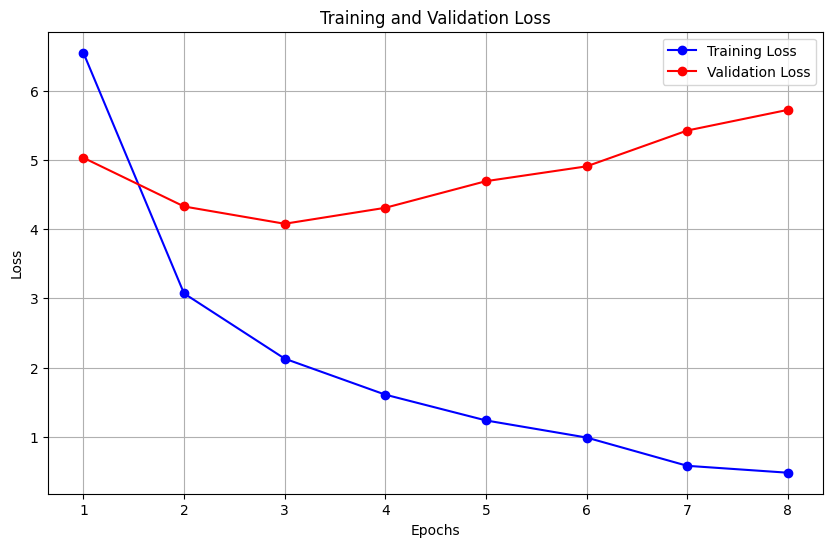

In [5]:
# Plotting the training and validation loss
plot_loss_curves(train_loss, val_loss)

### Saving the model

In [6]:
model_path = "models/qa_context_model_bidaf.pkl"

In [7]:
save_model(model, model_path)

Model saved to models/qa_context_model_bidaf.pkl


In [8]:
model = load_model(model_path=model_path)

Model loaded from models/qa_context_model_bidaf.pkl


### Evaluation Metrics Models

##### 1. Evaluation on Training set

In [9]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
evaluate_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question"], prefix_str="Training")

Evaluating:   0%|          | 0/623 [00:00<?, ?it/s]c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\nn\modules\rnn.py:911: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:1424.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,
Evaluating: 100%|██████████| 623/623 [00:19<00:00, 31.73it/s]

Training Loss: 1.2688
Training Metrics: {'start_accuracy': 0.8345045678144765, 'start_precision': 0.8367867319179747, 'start_recall': 0.8345045678144765, 'start_f1_score': 0.8345027168517684, 'end_accuracy': 0.83340026101797, 'end_precision': 0.8355319234503159, 'end_recall': 0.83340026101797, 'end_f1_score': 0.8330977895391858, 'joint_exact_match': 0.7981126392932436, 'span_overlap_f1': 0.824975148841973}


(1.2687601241407196,
 {'start_accuracy': 0.8345045678144765,
  'start_precision': 0.8367867319179747,
  'start_recall': 0.8345045678144765,
  'start_f1_score': 0.8345027168517684,
  'end_accuracy': 0.83340026101797,
  'end_precision': 0.8355319234503159,
  'end_recall': 0.83340026101797,
  'end_f1_score': 0.8330977895391858,
  'joint_exact_match': 0.7981126392932436,
  'span_overlap_f1': 0.824975148841973})

##### 2. Evaluation on Test Set

In [10]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
evaluate_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, criterion=criterion, device='cuda', inputs = ["context", "question"])

Evaluating:   0%|          | 0/63 [00:00<?, ?it/s]c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\nn\modules\rnn.py:911: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:1424.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,
Evaluating: 100%|██████████| 63/63 [00:02<00:00, 30.03it/s]

Validation Loss: 4.0746
Validation Metrics: {'start_accuracy': 0.5198592257415787, 'start_precision': 0.5445967340009351, 'start_recall': 0.5198592257415787, 'start_f1_score': 0.51910248796085, 'end_accuracy': 0.510306686777275, 'end_precision': 0.5396846717107887, 'end_recall': 0.510306686777275, 'end_f1_score': 0.5107364729301725, 'joint_exact_match': 0.4514831573655103, 'span_overlap_f1': 0.5215231206090468}


(4.074582489710005,
 {'start_accuracy': 0.5198592257415787,
  'start_precision': 0.5445967340009351,
  'start_recall': 0.5198592257415787,
  'start_f1_score': 0.51910248796085,
  'end_accuracy': 0.510306686777275,
  'end_precision': 0.5396846717107887,
  'end_recall': 0.510306686777275,
  'end_f1_score': 0.5107364729301725,
  'joint_exact_match': 0.4514831573655103,
  'span_overlap_f1': 0.5215231206090468})

### Predictions

##### 1. Predection on Dev Set

In [11]:
preds, true_labels, contexts, questions = predict_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Predicting:   0%|          | 0/63 [00:00<?, ?it/s]


TypeError: BiDAF.forward() got an unexpected keyword argument 'attention_mask_question'

In [ ]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {questions[i]}")
    print(f"Context: {contexts[i]}")
    print(f"Predicted Answer: {preds[i]}")
    print(f"True Answer: {true_labels[i]}")
    print("-" * 50)

Question: how many khitan tumens were there ?
Context: many han chinese and khitan defected to the mongols to fight against the jin . two han chinese leaders , shi tianze , liu heima ( 劉, liu ni ), and the khitan xiao zhala ( ) defected and commanded the 3 tumens in the mongol army . liu heima and shi tianze served ogödei khan . liu heima and shi tianxiang led armies against western xia for the mongols . there were 4 han tumens and 3 khitan tumens , with each tumen consisting of 10 , 000 troops . the three khitan generals shimobeidier ( 石), tabuyir ( 不) and xiaozhacizhizizhongxi ( 之子重喜 ) commanded the three khitan tumens and the four han generals zhang rou , yan shi , shi tianze , and liu heima commanded the four han tumens under ogödei khan .
Predicted Answer: two
True Answer: 3
--------------------------------------------------
Question: what is the atomic number of the element oxygen ?
Context: oxygen is a chemical element with symbol o and atomic number 8 . it is a member of the ch

##### 2. Predicitions on Training Set

In [ ]:
train_preds, train_true_labels, train_context, train_questions = predict_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, tokenizer=tokenizer, device='cuda', inputs = ["context", "question", "attention_mask_question"])

Predicting: 100%|██████████| 623/623 [00:49<00:00, 12.59it/s]


In [ ]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {train_questions[i]}")
    print(f"Context: {train_context[i]}")
    print(f"Predicted Answer: {train_preds[i]}")
    print(f"True Answer: {train_true_labels[i]}")
    print("-" * 50)

Question: how many troops had the japanese lost ?
Context: as many japanese had feared , japan ' s supply arrangements could not maintain her forces . once mutaguchi ' s hopes for an early victory were thwarted , his troops , particularly those at kohima , starved . during may , while mutaguchi continued to order attacks , the allies advanced southwards from kohima and northwards from imphal . the two allied attacks met on 22 june , breaking the japanese siege of imphal . the japanese finally broke off the operation on 3 july . they had lost over 50 , 000 troops , mainly to starvation and disease . this represented the worst defeat suffered by the japanese army to that date .[ citation needed ]
Predicted Answer: 50 , 000
True Answer: 50 , 000
--------------------------------------------------
Question: with the formal end of maratha empire the eic created a firm hold on what country ?
Context: with the gradual weakening of the marathas in the aftermath of the three anglo - maratha wars